In [81]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [105]:
UKBandwidthData = {
    "Speed": [
        "Fast","Slow","Fast","Slow","Fast","Slow","Fast","Slow",
        "Fast","Slow","Fast","Slow","Fast","Slow","Fast","Slow",
        "Fast","Slow","Fast","Slow","Fast","Slow","Fast","Slow",
        "Fast","Slow","Fast","Slow","Fast","Slow","Fast","Slow",
        "Fast","Slow","Fast","Slow","Fast","Slow","Fast","Slow",
        "Fast","Slow","Fast","Slow","Fast","Slow"
       
    ],
    "Year": [
        2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
        2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
        2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
        2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
        2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
        2019, 2019, 2019, 2019, 2019, 2019,
    ],
    "Month": [
        1, 1, 4, 4, 7, 7, 10, 10,
        1, 1, 4, 4, 7, 7, 10, 10,
        1, 1, 4, 4, 7, 7, 10, 10,
        1, 1, 4, 4, 7, 7, 10, 10,
        1, 1, 4, 4, 7, 7, 10, 10,
         1, 1, 4, 4, 7, 7,
    ],
    "Average Monthly Price, £": [
        36,26,34,24,33,22,34,24,
        29,20,29,17,30,18,30,24,
        30,21,29,18,29,24,33,25,
        28,18,28,21,27,17,30,17,
        26,18,28,18,26,20,26,20,
        26,20,28,24,28,22
   ]
}

UKBandwidthDF = pd.DataFrame(UKBandwidthData)

UKCodedBandwidthCodedData = {
    "Speed": [
        46.2, 46.2, 46.2, 46.2, 
        54.2, 54.2, 54.2, 54.2,
        64.0, 64.0, 64.0
    ],
    "fastInternetPercent": [
        0.54, 0.54, 0.54, 0.54,
        0.58, 0.58, 0.58, 0.58,
        0.75, 0.75, 0.75
    ],
    "Year": [
        2017, 2017, 2017, 2017,
        2018, 2018, 2018, 2018,
        2019, 2019, 2019,
    ],
    "Month": [
        1, 4, 7, 10,
        1, 4, 7, 10,
        1, 4, 7,
    ],
    "Average Monthly Price, £": [],
}

for i in range(24, 35):
    fast = UKBandwidthData["Average Monthly Price, £"][i]*UKCodedBandwidthCodedData["fastInternetPercent"][i-24] 
    slow = UKBandwidthData["Average Monthly Price, £"][i+1]*(1-UKCodedBandwidthCodedData["fastInternetPercent"][i-24])
    weightedMean = fast + slow
    UKCodedBandwidthCodedData["Average Monthly Price, £"].append(weightedMean)

UKCodedBandwidthCodedDF = pd.DataFrame(UKCodedBandwidthCodedData)

UKCodedBandwidthMainData = {
    "Speed": [
        46.2,
        54.2,
        64.0,
    ],
    "fastInternetPercent": [
        0.54,
        0.58,
        0.75,
    ],
    "Year": [
        2017,
        2018,
        2019
    ],
    "Average Monthly Price, £": [],
}

# take a mean of the average monthly price for the UKCodedBandwidthCodedData for each year
UKCodedBandwidthMainData["Average Monthly Price, £"].append(UKCodedBandwidthCodedDF["Average Monthly Price, £"][0:4].mean())
UKCodedBandwidthMainData["Average Monthly Price, £"].append(UKCodedBandwidthCodedDF["Average Monthly Price, £"][4:8].mean())
UKCodedBandwidthMainData["Average Monthly Price, £"].append(UKCodedBandwidthCodedDF["Average Monthly Price, £"][8:12].mean())

UKCodedBandwidthMainDataDF = pd.DataFrame(UKCodedBandwidthMainData)

R-squared value: 0.661972060219731


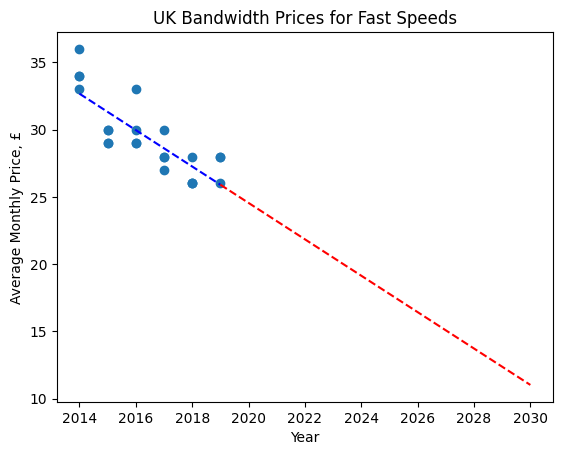

In [106]:
# plot fast speeds only
fast = UKBandwidthDF[UKBandwidthDF["Speed"] == "Fast"]
plt.scatter(fast["Year"], fast["Average Monthly Price, £"])

# plot linear regression
mMonthlyPrice, bMonthlyPrice = np.polyfit(fast["Year"], fast["Average Monthly Price, £"], 1)
plt.plot(fast["Year"], mMonthlyPrice*fast["Year"] + bMonthlyPrice, "b--")
# plot extrapolation
plt.plot([2019, 2030], [mMonthlyPrice*2019 + bMonthlyPrice, mMonthlyPrice*2030 + bMonthlyPrice], "r--")

plt.xlabel("Year")
plt.ylabel("Average Monthly Price, £")
plt.title("UK Bandwidth Prices for Fast Speeds")

predicted_prices = mMonthlyPrice * fast["Year"] + bMonthlyPrice
r2 = r2_score(fast["Average Monthly Price, £"], predicted_prices)
print("R-squared value:", r2)

plt.show()

R-squared value: 0.10519058259658642


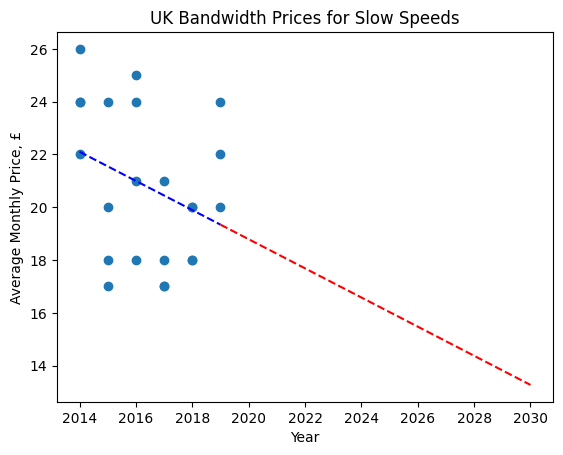

In [107]:
# plot slow speeds only
slow = UKBandwidthDF[UKBandwidthDF["Speed"] == "Slow"]
plt.scatter(slow["Year"], slow["Average Monthly Price, £"])

# plot linear regression
mMonthlyPrice, bMonthlyPrice = np.polyfit(slow["Year"], slow["Average Monthly Price, £"], 1)
plt.plot(slow["Year"], mMonthlyPrice*slow["Year"] + bMonthlyPrice, "b--")
# plot extrapolation
plt.plot([2019, 2030], [mMonthlyPrice*2019 + bMonthlyPrice, mMonthlyPrice*2030 + bMonthlyPrice], "r--")

plt.xlabel("Year")
plt.ylabel("Average Monthly Price, £")
plt.title("UK Bandwidth Prices for Slow Speeds")

predicted_prices = mMonthlyPrice * slow["Year"] + bMonthlyPrice
r2 = r2_score(slow["Average Monthly Price, £"], predicted_prices)
print("R-squared value:", r2)

plt.show()

R-squared value: 0.010598168103759575


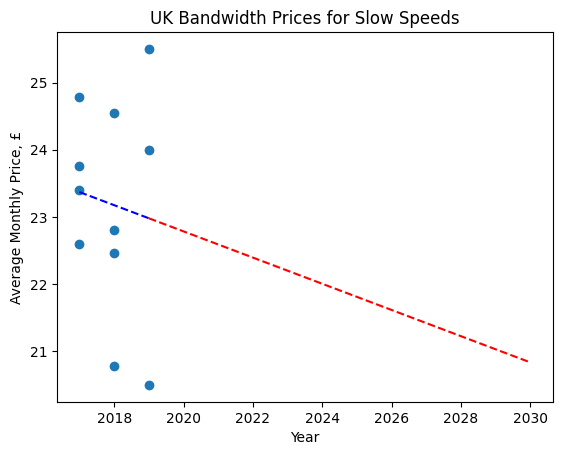

In [108]:
plt.scatter(UKCodedBandwidthCodedDF["Year"], UKCodedBandwidthCodedDF["Average Monthly Price, £"])

# plot linear regression
mMonthlyPrice, bMonthlyPrice = np.polyfit(UKCodedBandwidthCodedDF["Year"], UKCodedBandwidthCodedDF["Average Monthly Price, £"], 1)
plt.plot(UKCodedBandwidthCodedDF["Year"], mMonthlyPrice*UKCodedBandwidthCodedDF["Year"] + bMonthlyPrice, "b--")
# plot extrapolation
plt.plot([2019, 2030], [mMonthlyPrice*2019 + bMonthlyPrice, mMonthlyPrice*2030 + bMonthlyPrice], "r--")

plt.xlabel("Year")
plt.ylabel("Average Monthly Price, £")
plt.title("UK Bandwidth Prices for Slow Speeds")

predicted_prices = mMonthlyPrice * UKCodedBandwidthCodedDF["Year"] + bMonthlyPrice
r2 = r2_score(UKCodedBandwidthCodedDF["Average Monthly Price, £"], predicted_prices)
print("R-squared value:", r2)

plt.show()

R-squared value: 0.9962349673359119


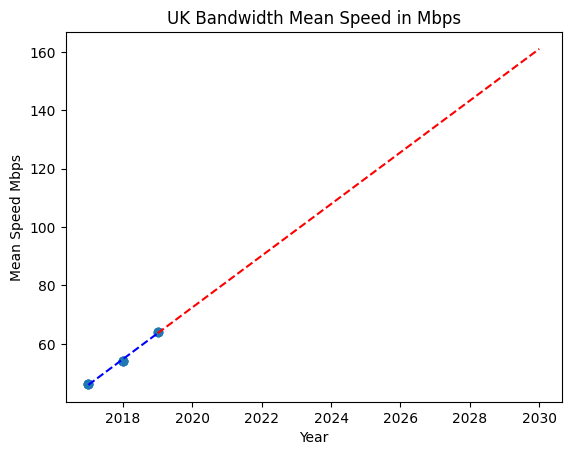

In [109]:
plt.scatter(UKCodedBandwidthCodedDF["Year"], UKCodedBandwidthCodedDF["Speed"])

# plot linear regression
mMeanSpeed, bMeanSpeed = np.polyfit(UKCodedBandwidthCodedDF["Year"], UKCodedBandwidthCodedDF["Speed"], 1)
plt.plot(UKCodedBandwidthCodedDF["Year"], mMeanSpeed*UKCodedBandwidthCodedDF["Year"] + bMeanSpeed, "b--")
# plot extrapolation
plt.plot([2019, 2030], [mMeanSpeed*2019 + bMeanSpeed, mMeanSpeed*2030 + bMeanSpeed], "r--")

plt.xlabel("Year")
plt.ylabel("Mean Speed Mbps")
plt.title("UK Bandwidth Mean Speed in Mbps")

predicted_speeds = mMeanSpeed * UKCodedBandwidthCodedDF["Year"] + bMeanSpeed
r2 = r2_score(UKCodedBandwidthCodedDF["Speed"], predicted_speeds)
print("R-squared value:", r2)

plt.show()

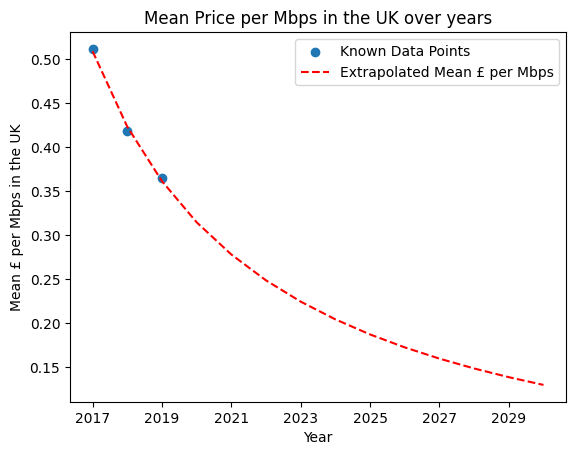

In [114]:
# calculate the mean price per Mbps for each year
avgDownloadSpeed = UKCodedBandwidthCodedDF.groupby("Year")["Speed"].mean()
avgPrice = UKCodedBandwidthCodedDF.groupby("Year")["Average Monthly Price, £"].mean()
meanPricePerMbps = avgPrice / avgDownloadSpeed

# meanPricePerMbps
plt.scatter(meanPricePerMbps.index, meanPricePerMbps.values)
plt.xlabel("Year")
plt.ylabel("Mean £ per Mbps in the UK")
plt.title("Mean Price per Mbps in the UK over years")

extrapolated_years = np.arange(2017, 2031)
plt.plot(extrapolated_years, (mMonthlyPrice*extrapolated_years + bMonthlyPrice)/(mMeanSpeed*extrapolated_years + bMeanSpeed), "r--")
plt.xticks(np.arange(2017, 2031, 2))

plt.legend(["Known Data Points", "Extrapolated Mean £ per Mbps"])

plt.show()